In [37]:
#-*-utf-8-*-

#import libraries
import sys  #access to system parameters 
print("Python version:{}".format(sys.version))

import pandas as pd  #collection of functions for data processing and analysis modeled after R dataframes with SQL-like features
print("pandas version:{}".format(pd.__version__))

import matplotlib
print("matplotlib version:{}".format(matplotlib.__version__))

import numpy as np  #foundational package for scientific computing
print("Numpy version:{}".format(np.__version__))

import scipy as sp  #collections of functions for scientific computing and advance mathematics
print("scipy version:{}".format(sp.__version__))

import IPython
from IPython import display  #pretty printing of dataframe in Jupyter notebook
print("IPython version:{}".format(IPython.__version__))

import sklearn  #collection of machine learning algorithms
print("scikit-learn version:{}".format(sklearn.__version__))

#miscellaneous libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

Python version:3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
pandas version:0.20.3
matplotlib version:2.1.0
Numpy version:1.13.3
scipy version:0.19.1
IPython version:6.1.0
scikit-learn version:0.19.1


In [38]:
#load data modeling libraries

#common model algorithms
from sklearn import svm,tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
from xgboost import XGBClassifier

#common model helpers
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#visualizaiotn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#configure visualizaiton defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [39]:
#import data
data_raw = pd.read_csv(r"J:\Projects\Datasets\train.csv")
data_val = pd.read_csv(r"J:\Projects\Datasets\test.csv")

#split datasets into 3 parts:train,test,validation,so split train sets into training and test sets
#to play with data in copy mode,namely keep raw source unchange
data1 = data_raw.copy(deep=True)

#create a cleaner,for we will clean the raw data
data_cleaner = [data1,data_val]

In [40]:
#preview data
print(data_raw.info())
data_raw.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


In [41]:
'''4C's of Data Cleaning
Correcting:handling outliers or unreasonable values, e.g.age=800 instead of 80
Completing:handling missing values.Basic methods:for qualitative data use mode,for quantitative data use mean,median or mean+random standard deviation
Creating:Feature engineering is when we use existed features to create new features to determine if they provide new signals to predict outcome.
Converting:handing formating.there are no data or currency formats,to convert object datatype to categorical dummy variable for math calcuation
'''

print("Train columns with null values:\n",data1.isnull().sum())
print('-'*10)

print("Test/Validation columns with null values:\n",data_val.isnull().sum())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [42]:
#clean data

for dataset in data_cleaner:
    #用均值补齐年龄缺失值，设置inplace为True,就地修改数据
    dataset['Age'].fillna(dataset['Age'].median(),inplace = True)
    
    #用众数补齐登陆口岸
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace = True)
    
    #用均值补齐票价缺失值
    dataset.fillna(dataset['Fare'].median(),inplace = True)
    
#删除乘客编号、客舱编号、船票信息这三个无意义且不影响数据挖掘的特征列
drop_column = ['PassengerId','Cabin','Ticket']
data1.drop(drop_column,axis = 1,inplace = True)  #axis = 1，在列方向上删除

#下面再次检查是否还有缺失值
print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [43]:
#对训练集和测试集/验证集进行特征工程
for dataset in data_cleaner:
    #离散化变量
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  #创建“家庭规模”这个新特征，加1是防止无父母子女、堂兄弟等亲戚登船时为0
    
    dataset['IsAlone'] = 1  #初始化为1，表示独自一人登船
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0  #如果家族有超过1人登船，则不是alone
    
    #从名字中拆分title,即Mr,Mrs,Miss等称呼
    dataset['Title'] = dataset['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
    
    #连续化变量
    #对于船票价格桶分析，使用qcut根据频率来划分
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)  #依照分位数化为4部分
    
    #年龄段分析，使用cut根据年龄段划分
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5)  #分为5个年龄段，且强制转换为整数型
    
#清理稀少的title names
stat_min = 10  #使用统计学上常用的最小值
title_names = (data1['Title'].value_counts() < stat_min)  #返回一个布尔型series，作为title_name的索引

#使用上面得到的series，如果该title是稀有的，则用Misc(Miscellaneous)来代指，并创建新特征列'Title'
data1['Title'] = data1['Title'].apply(lambda x:'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())  #打印出Title这一新特征的信息
print('-'*10)

#再次预览数据
data1.info()
data_val.info()
data1.sample(6)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
396,0,3,"Olsson, Miss. Elina",female,31.0,0,0,7.8542,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
141,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,7.7500,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
133,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
830,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,14.4542,C,2,0,Mrs,"(7.91, 14.454]","(-0.08, 16.0]"
284,0,1,"Smith, Mr. Richard William",male,28.0,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,6.2375,S,1,1,Mr,"(-0.001, 7.91]","(48.0, 64.0]"


In [44]:
#转换数据格式
#分类型数据
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
Target = ['Survived']  #定义y变量为target

#原始特征
data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']  #便于之后作图
data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']  #用于之后的算法中的计算
data1_xy = Target + data1_x
print('Original X Y : ',data1_xy,'\n')

#消除连续变量后的桶分析特征
data1_x_bin = ['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y : ',data1_xy_bin,'\n')

#dummy features
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y : ',data1_xy_dummy,'\n')

data1_dummy.head()

Original X Y :  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y :  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y :  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [45]:
#至此，数据清洗步骤结束，下面我们最后一次检查一下数据是否干净整齐
print("Train columns with null values:\n",data1.isnull().sum())
print('-'*15)
print(data1.info())
print('-'*15)

print("Test/Validation columns with null values:\n",data_val.isnull().sum())
print('-'*15)
print(data_val.info())
print('-'*15)

data_raw.describe(include = 'all')

Train columns with null values:
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null ca

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [46]:
#划分训练集和测试集,random_state -->seed or control random number generator,默认训练集比例为75%
train1_x,test1_x,train1_y,test1_y = model_selection.train_test_split(data1[data1_x_calc],data1[Target],random_state=0)
train1_x_bin,test1_x_bin,train1_y_bin,test1_y_bin = model_selection.train_test_split(data1[data1_x_bin],data1[Target],random_state=0)
train1_x_dummy,test1_x_dummy,train1_y_dummy,test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy],data1[Target],random_state=0)

print("Data1 Shape:{}".format(data1.shape))
print("Train1 Shape:{}".format(train1_x.shape))
print("Test1 Shape:{}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape:(891, 19)
Train1 Shape:(668, 8)
Test1 Shape:(223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


Step2 探索数据：使用统计性分析描述并汇总数据信息，并且探索个特征之间的相关性

In [47]:
#我们知道性别因素对是否存货有很大的影响，那其他特征呢？这里，探索所有特征与生存的相关性。
for x in data1_x:  #data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:',x)
        print(data1[[x,Target[0]]].groupby(x,as_index = False).mean())  #as_index=True will yank out rows by using the key names
        print('-'*25)
        
#使用交叉表展示Title与生存的关系(额外的展示方案)
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------------
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------------
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------------
Survival Correlation by: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
-------------------------
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------------
Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------------
Su

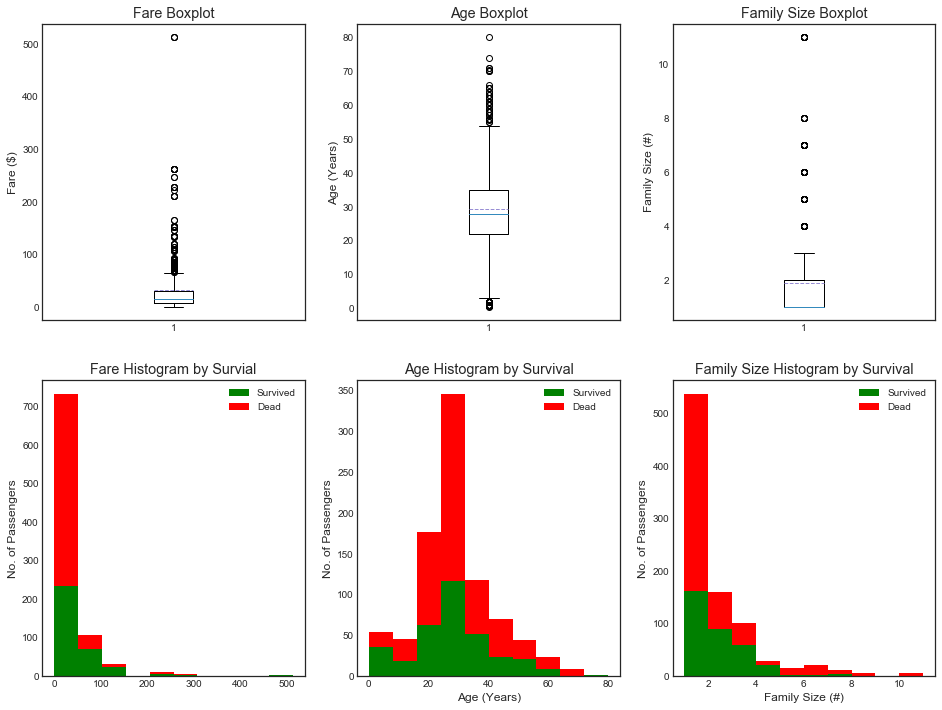

In [48]:
#使用matplotlib作图
plt.figure(figsize = [16,12])

plt.subplot(231)  #共有6个子图，排列方式为2行3列，当前为第一个子图
plt.boxplot(x = data1['Fare'],showmeans = True,meanline = True)  #showmeans = True将会显示均值
plt.title("Fare Boxplot")
plt.ylabel("Fare ($)")

plt.subplot(232)
plt.boxplot(data1['Age'],showmeans = True,meanline = True)
plt.title("Age Boxplot")
plt.ylabel("Age (Years)")

plt.subplot(233)
plt.boxplot(data1['FamilySize'],showmeans = True,meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel("Family Size (#)")

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]["Fare"],data1[data1['Survived']==0]["Fare"]],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title("Fare Histogram by Survial")
plt.ylabel("No. of Passengers")
plt.legend()  #自动创建图例，即使用label中的标签作为图例

plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title("Age Histogram by Survival")
plt.xlabel("Age (Years)")
plt.ylabel('No. of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x=[data1[data1['Survived']==1]["FamilySize"],data1[data1['Survived']==0]["FamilySize"]],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title("Family Size Histogram by Survival")
plt.xlabel("Family Size (#)")
plt.ylabel("No. of Passengers")
plt.legend()

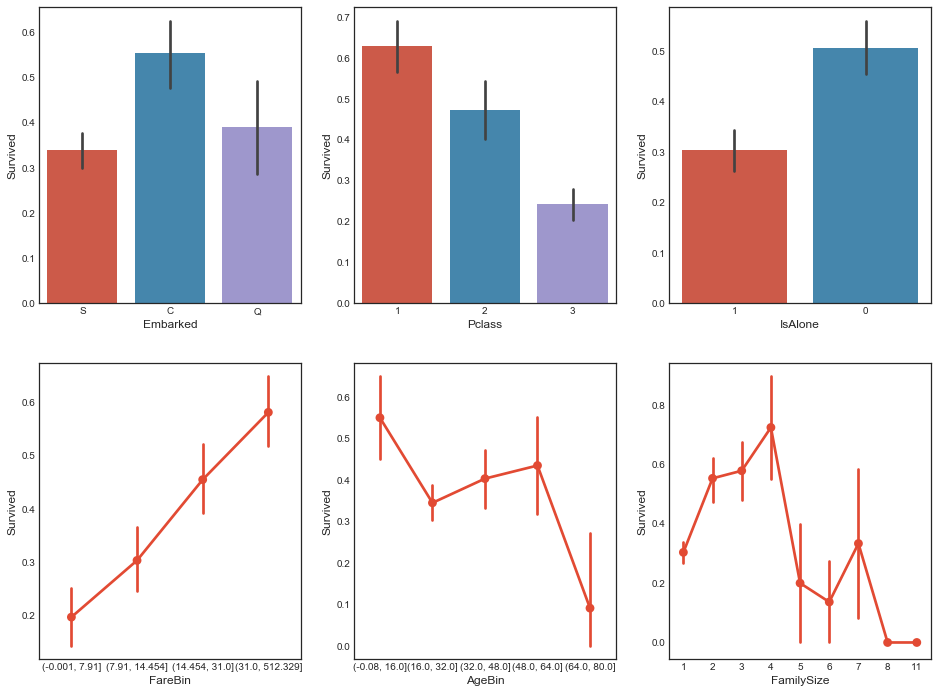

In [49]:
#使用seaborn作图来作多变量比对
fig,saxis = plt.subplots(2,3,figsize=(16,12))

sns.barplot(x = 'Embarked',y = 'Survived',data = data1,ax = saxis[0,0])  #第0行第0列，即左上角第一个图形，后面的依此类推
sns.barplot(x = 'Pclass',y = 'Survived',order = [1,2,3],data = data1,ax = saxis[0,1])
sns.barplot(x = 'IsAlone',y = 'Survived',order = [1,0],data = data1,ax = saxis[0,2])

sns.pointplot(x = 'FareBin',y = 'Survived',data = data1,ax = saxis[1,0])
sns.pointplot(x = 'AgeBin',y = 'Survived',data = data1,ax = saxis[1,1])
sns.pointplot(x = 'FamilySize',y = 'Survived',data = data1,ax = saxis[1,2])

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

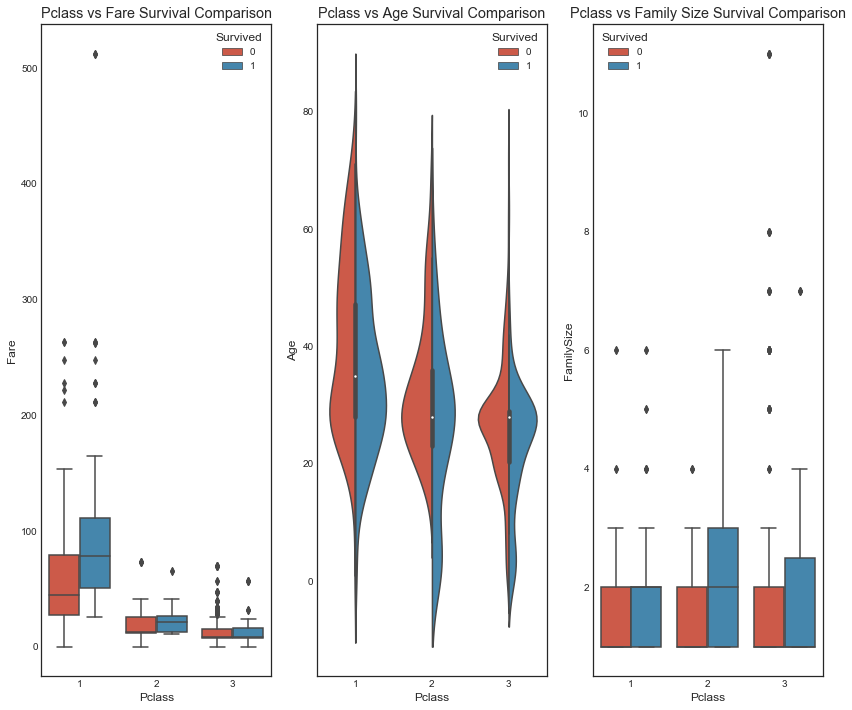

In [50]:
#再展示一种分析图形：船舱等级与票价、年龄、家庭成员数之间的组合生存机率
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass',y = 'Fare',hue = 'Survived',data = data1,ax = axis1)  #传入hue参数添加多个嵌套的分类变量
axis1.set_title("Pclass vs Fare Survival Comparison")

sns.violinplot(x = 'Pclass',y = 'Age',hue = 'Survived',data = data1,split = True,ax = axis2)  #提琴图
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass',y = 'FamilySize',hue = 'Survived',data = data1,ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5,1,'Sex vs IsAlone Survival Comparison')

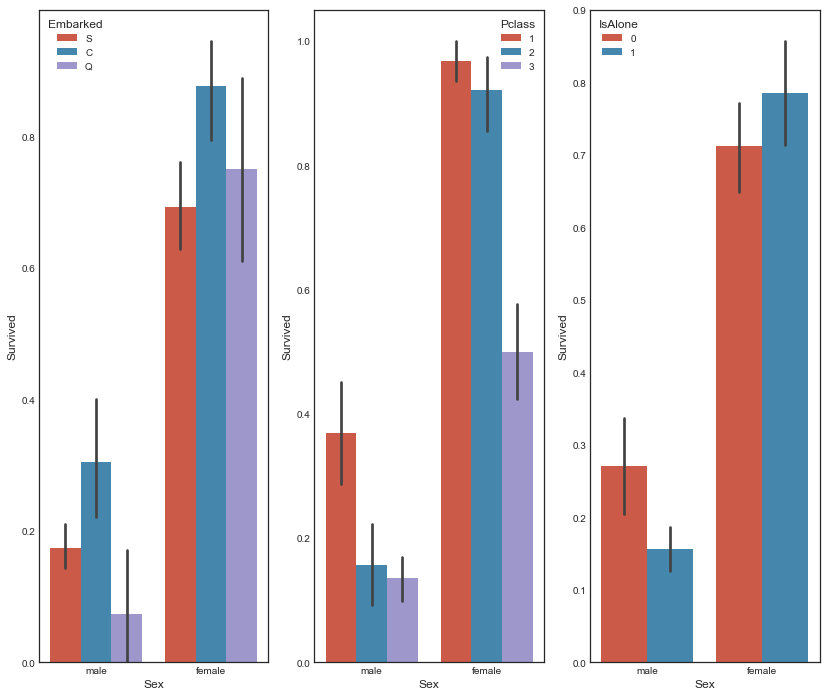

In [51]:
#再展示一种分析图形：性别与登船港口、船舱等级、是否独自旅行之间的组合生存机率
fig,qaxis = plt.subplots(1,3,figsize = (14,12))

sns.barplot(x = 'Sex',y = 'Survived',hue = 'Embarked',data = data1,ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex',y = 'Survived',hue = 'Pclass',data = data1,ax = qaxis[1])
axis2.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex',y = 'Survived',hue = 'IsAlone',data = data1,ax = qaxis[2])
axis3.set_title('Sex vs IsAlone Survival Comparison')

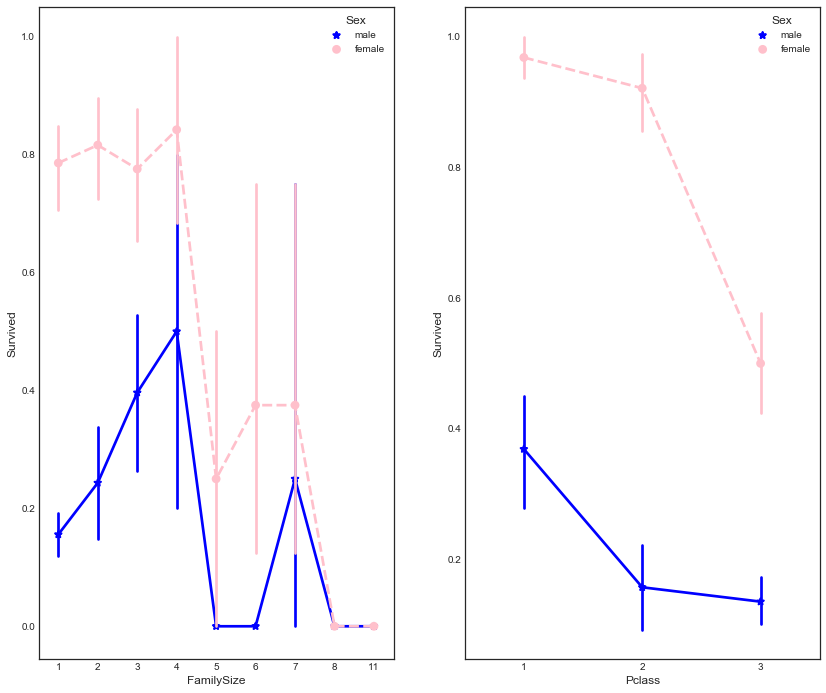

In [52]:
#更多的比对
fig,(maxis1,maxis2) = plt.subplots(1,2,figsize = (14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x = "FamilySize",y = 'Survived',hue = 'Sex',data = data1,palette = {"male":"blue","female":"pink"},
              markers = ["*","o"],linestyles = ["-","--"],ax = maxis1)
#how does class factor with sex & survival compare
sns.pointplot(x = 'Pclass',y = 'Survived',hue = 'Sex',data = data1,palette = {"male":"blue","female":"pink"},
              markers = ["*","o"],linestyles = ["-","--"],ax = maxis2)

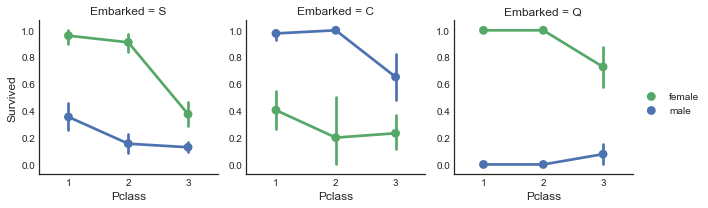

In [53]:
#how does embark port factor with class,sex and survival compare
e = sns.FacetGrid(data1,col = 'Embarked')
e.map(sns.pointplot,"Pclass","Survived","Sex",ci = 95.0,palette = "deep")  #ci=95,定制标准差为95%
e.add_legend()

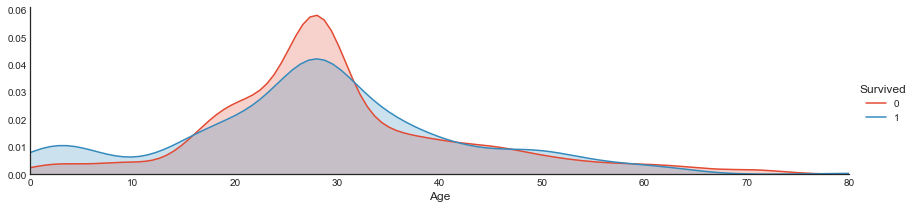

In [54]:
#针对乘客的存活情况，画出年龄分布
a = sns.FacetGrid(data1,hue = 'Survived',aspect = 4)
a.map(sns.kdeplot,'Age',shade = True)
a.set(xlim = (0,data1['Age'].max()))
a.add_legend()

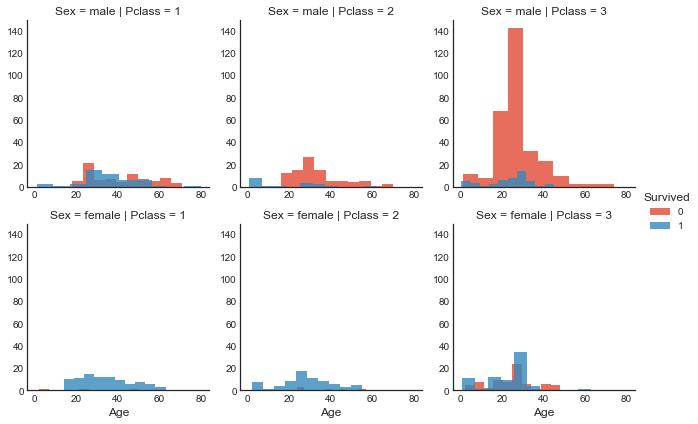

In [55]:
#用直方图比较性别，船舱等级，年龄与存活的关系
h = sns.FacetGrid(data1,row = 'Sex',col = 'Pclass',hue = 'Survived')
h.map(plt.hist,'Age',alpha = 0.8)
h.add_legend()

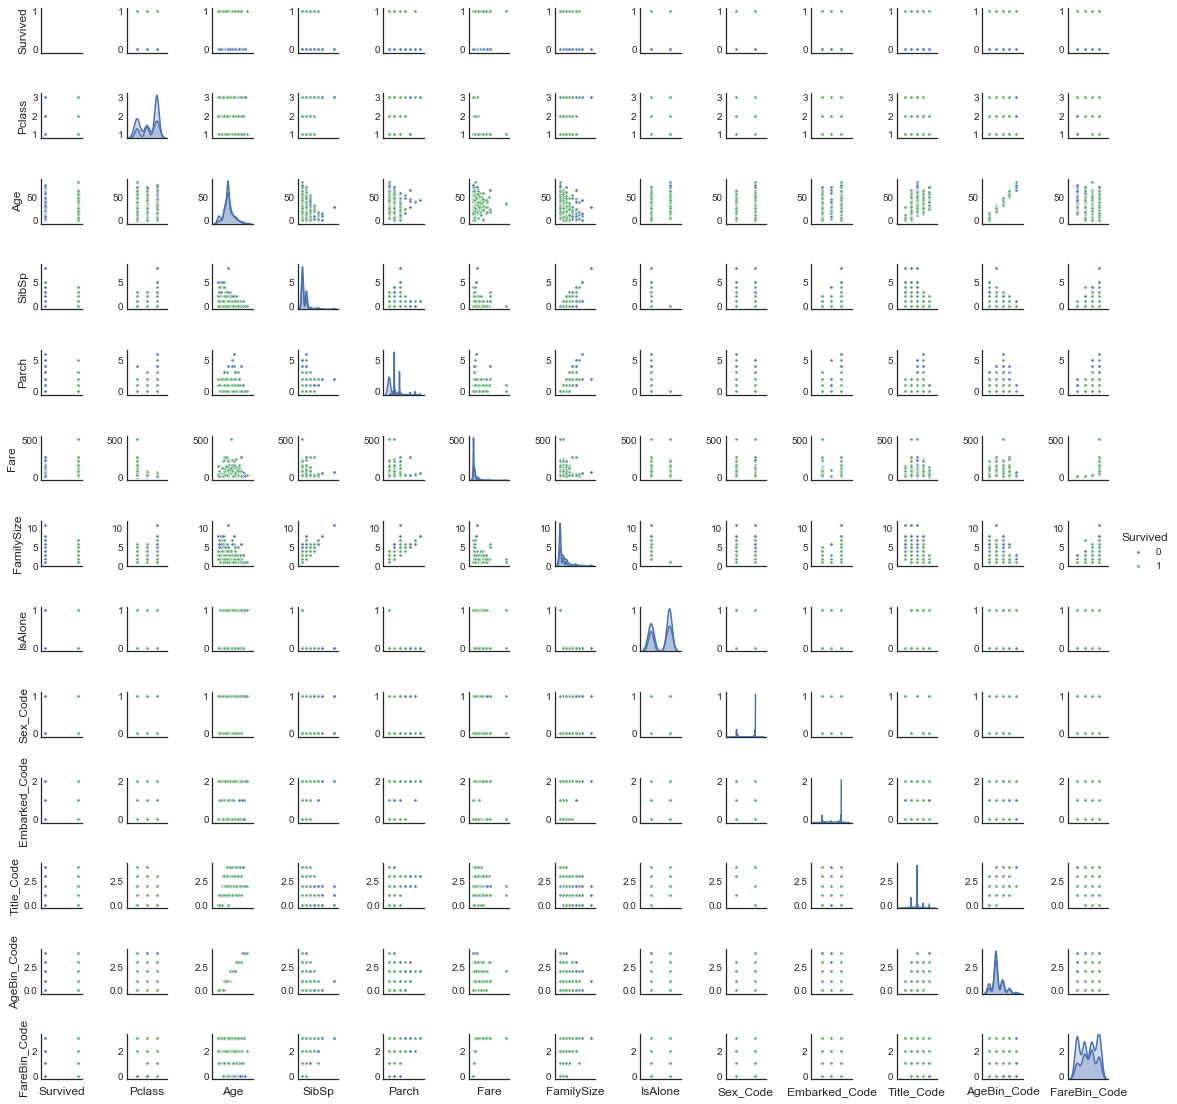

In [56]:
#pair plots of entire dataset
pp = sns.pairplot(data1,hue = 'Survived',palette = 'deep',size = 1.2,diag_kind = 'kde',diag_kws = dict(shade=True),plot_kws=dict(s=10))
pp.set(xticklabels = [])

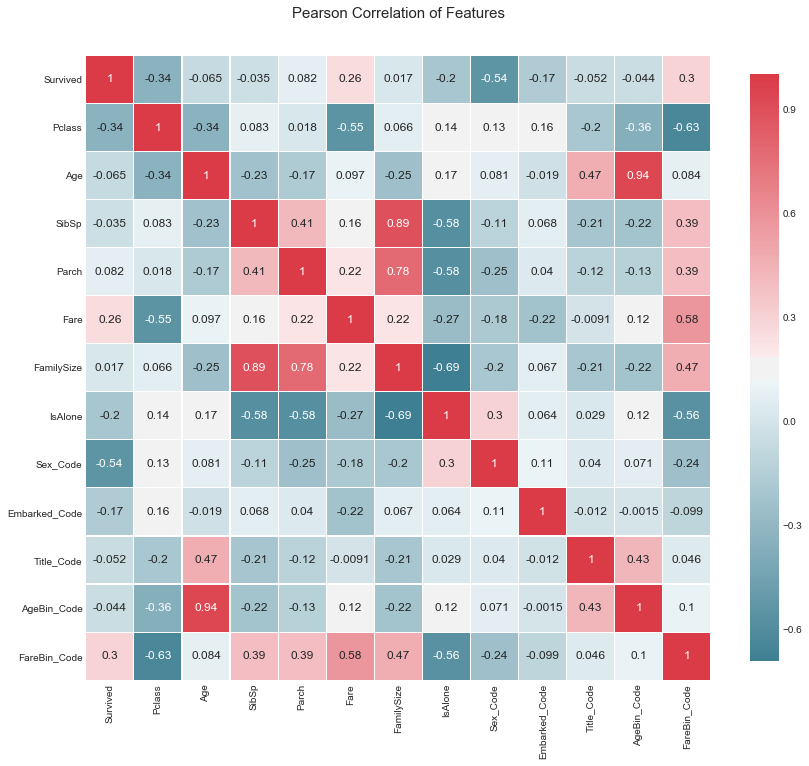

In [57]:
#相关性heatmap
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize = (14,12))
    colormap = sns.diverging_palette(220,10,as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap=colormap,square=True,cbar_kws={'shrink':0.9},ax=ax,annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
    
correlation_heatmap(data1)

Step 3 使用机器学习算法训练模型

In [58]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost
    XGBClassifier()    
    ]

In [59]:
#构建划分
cv_split = model_selection.ShuffleSplit(n_splits = 10,test_size = 0.3,train_size = 0.6,random_state = 0)

#创建一个数据框，以便比较各个算法
MLA_columns = ['MLA Name','MLA Parameters','MLA Train Accuracy Mean','MLA Test Accuracy Mean','MLA Test Accuracy 3*STD','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#创建表格，比较算法的预测情况
MLA_predict = data1[Target]

#把各个算法的performance保存到上述表格
row_index = 0
for alg in MLA:
    #设置名字和参数
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name  #在数据框中添加算法名称
    MLA_compare.loc[row_index,'MLA Parameters'] = str(alg.get_params())
    
    #用sklearn中的cross validation给各个算法打分
    cv_results = model_selection.cross_validate(alg,data1[data1_x_bin],data1[Target],cv = cv_split)
    
    MLA_compare.loc[row_index,'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index,'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index,'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    
    #对于无偏的随机变量，加减3个标准差能涵盖99.7%的数据
    MLA_compare.loc[row_index,'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    #保存MLA的预测
    alg.fit(data1[data1_x_bin],data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index += 1
    
#逆序排列，即把准确率最高的算法放在最上面
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'],ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.827239,0.0430788,0.0207596
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.839139,0.826866,0.0439856,0.0339412
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.836517,0.826119,0.0470149,0.0376088
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.891386,0.824627,0.0637175,0.0116684
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.823134,0.0483292,0.0128021
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.867041,0.821642,0.0517353,0.0594956
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.820149,0.058338,0.00160046
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.849625,0.819776,0.0631347,0.00131006
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.890824,0.818657,0.0633626,0.0167284
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820599,0.810075,0.0476108,0.060141


Text(0,0.5,'Algorithm')

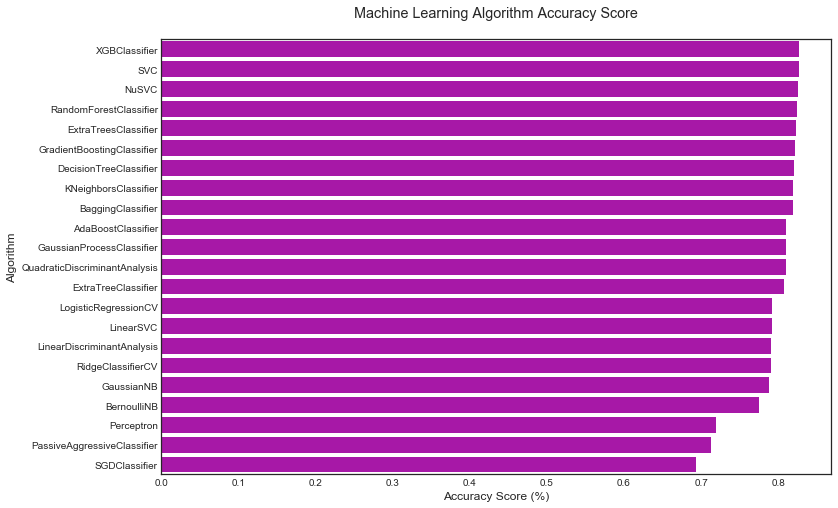

In [60]:
#用图标展示各算法的准确率
sns.barplot(x = "MLA Test Accuracy Mean",y = "MLA Name",data = MLA_compare,color = 'm')
plt.title("Machine Learning Algorithm Accuracy Score\n")
plt.xlabel("Accuracy Score (%)")
plt.ylabel("Algorithm")

下面对算法的表现进行评价。首先构建一个随机猜测

In [61]:
for index,row in data1.iterrows():
    if random.random() > 0.5:  #Random float x, 0.0 <= x <= 1.0
        data1.set_value(index,'Random_Predict',1)  #预测存活
    else:
        data1.set_value(index,'Random_Predict',0)  #预测死亡
        
#给随机猜测打分，1代表猜对了，0代表猜错了
#列的均值会等于准确率
data1['Random_Score'] = 0  #初始化为0，默认猜错
data1.loc[(data1['Survived'] == data1['Random_Predict']),'Random_Score'] = 1  #猜对了修改值为1
print("Coin Flip Model Accuracy:{0:.2f}%".format(data1['Random_Score'].mean()*100))

Coin Flip Model Accuracy:51.96%


In [62]:
pivot_female = data1[data1.Sex == 'female'].groupby(['Sex','Pclass','Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree with Female Node:\n',pivot_female)

pivot_male = data1[data1.Sex == 'male'].groupby(['Sex','Title']).mean()
print('\n\nSurvival Decision Tree with Male Node:\n',pivot_male)

Survival Decision Tree with Female Node:
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.50000

In [63]:
#手写一个决策树模型
def mytree(df):
    #创建空数据框，存储预测值
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master']  #survived title
    
    for index,row in df.iterrows():
        #问题1：是否在船上
        Model.loc[index,'Predict'] = 0
        #问题2：是否是女性
        if (df.loc[index,'Sex'] == 'female'):
            Model.loc[index,'Predict'] = 1
        #把
        if ((df.loc[index,'Sex']=='female')&(df.loc[index,'Pclass']==3)&(df.loc[index,'Embarked']=='S')&(df.loc[index,'Fare']>8)):
            Model.loc[index,'Predict'] = 0
            
        if ((df.loc[index,'Sex']=='male')&(df.loc[index,'Title'] in male_title)):
            Model.loc[index,'Predict'] = 1
            
    return Model

Tree_Predict = mytree(data1)
print("Decision Tree Model Accuracy/Precision Score:{0:.2f}%\n".format(metrics.accuracy_score(data1['Survived'],Tree_Predict)*100))

#召回率=（真正例）/（真正例+假负例），F1分数=准确率和召回率的加权平均
print(metrics.classification_report(data1['Survived'],Tree_Predict))

Decision Tree Model Accuracy/Precision Score:81.37%

             precision    recall  f1-score   support

          0       0.80      0.94      0.86       549
          1       0.86      0.62      0.72       342

avg / total       0.82      0.81      0.81       891



Confusion matrix,without normalization
[[514  35]
 [131 211]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.38  0.62]]


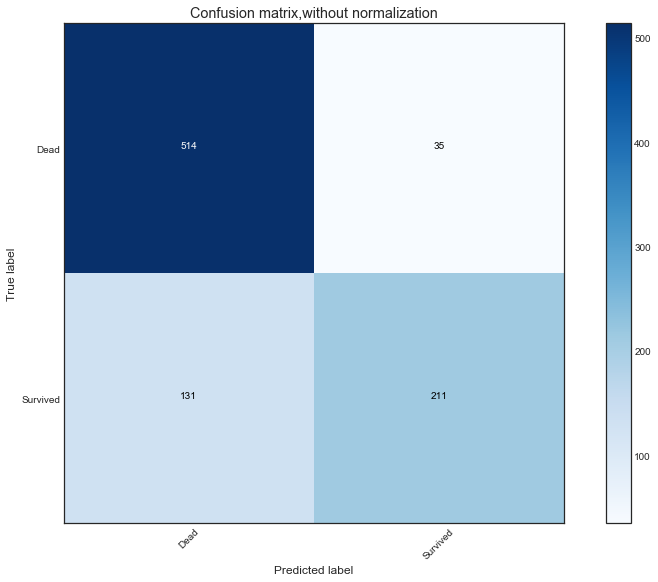

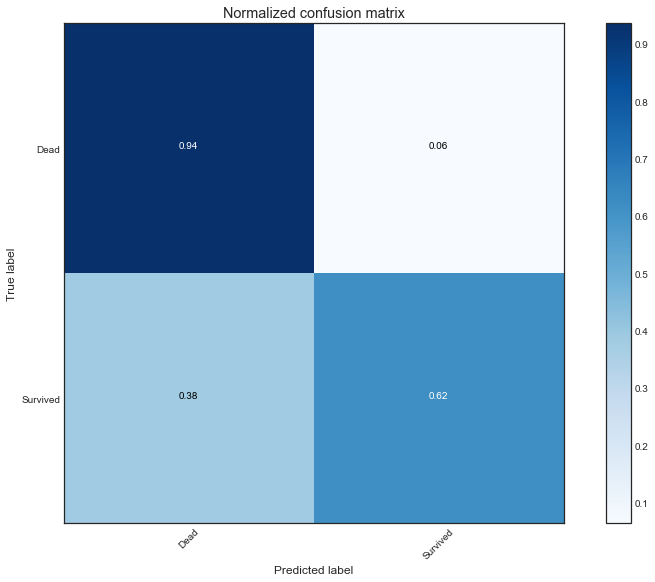

In [64]:
#plot Accuracy Summary
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix,without normalization')
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.0
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
#计算混淆矩阵
cnf_matrix = metrics.confusion_matrix(data1['Survived'],Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead','Survived']

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes = class_names,title = 'Confusion matrix,without normalization')

#Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize = True,title = 'Normalized confusion matrix')

In [65]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree,data1[data1_x_bin],data1[Target],cv = cv_split)
dtree.fit(data1[data1_x_bin],data1[Target])

print('BEFORE DT Parameters: ',dtree.get_params())
print('BEFORE DT Training with bin score mean:{0:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test with bin score mean:{0:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test with bin score 3*std: +/- {0:.2f}'.format(base_results['test_score'].std()*100))
print('-'*20)

#调整超参数。超参数就是用来确定模型的一些参数，比如学习速率，迭代次数等。
param_grid = {'criterion':['gini','entropy'],  #信息增益计算方式选择基尼系数
              'max_depth':[2,4,6,8,10,None],  #决策树最多可以生长到第几层，默认是None
              'random_state':[0]}

#根据grid_search选择最优模型
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid = param_grid,scoring='roc_auc',cv=cv_split)
tune_model.fit(data1[data1_x_bin],data1[Target])

print('AFTER DT Parameters: ',tune_model.best_params_)
print('AFTER DT Training with bin score mean:{0:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test with bin score mean:{0:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT Test with bin score 3*std: +/- {0:.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*3*100))
print('-'*20)

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training with bin score mean:89.51
BEFORE DT Test with bin score mean:82.05
BEFORE DT Test with bin score 3*std: +/- 1.90
--------------------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training with bin score mean:89.41
AFTER DT Test with bin score mean:87.63
AFTER DT Test with bin score 3*std: +/- 6.44
--------------------


下面通过特征选择进一步调参。参数不在多，而在恰当，好的参数才能增强模型的表现。下面使用sklearn里的recursive_feature_elimination with cross validion.

In [66]:
print('BEFORE DT RFE Training Shape Old: ',data1[data1_x_bin].shape)
print('BEFORE DT RFE Training Columns Old: ',data1[data1_x_bin].columns.values)

#未进行特征
print('BEFORE DT RFE Training with bin score mean: {0:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT RFE Test with bin score mean:{0:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT RFE with bin score 3*std :+/- {0:.2f}'.format(base_results['test_score'].std()*3*100))
print('-'*40)

#特征选择
dtree_rfe = feature_selection.RFECV(dtree,step=1,scoring='accuracy',cv=cv_split)
dtree_rfe.fit(data1[data1_x_bin],data1[Target])

#transform x&y to reduced features and fit new model
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree,data1[X_rfe],data1[Target],cv=cv_split)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ',data1[X_rfe].shape)
print('AFTER DT RFE Training Columns New: ',X_rfe)

print('AFTER DT RFE Training with bin score mean:{0:.2f}'.format(rfe_results['train_score'].mean()*100))
print('AFTER DT RFE Test with bin score mean:{0:.2f}'.format(rfe_results['test_score'].mean()*100))
print('AFTER DT RFE Test with bin score 3*std: +/- {0:.2f}'.format(rfe_results['test_score'].std()*3*100))
print('-'*40)

#针对rfe_model调参
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid = param_grid,scoring='roc_auc',cv=cv_split)
rfe_tune_model.fit(data1[X_rfe],data1[Target])

print('AFTER DT RFE Tuned Parameters: ',rfe_tune_model.best_params_)
print('AFTER DT RFE Tuned Training w/bin score mean: {0:.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT RFE Tuned Test w/bin score mean: {0:.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT RFE Tuned Test w/bin score 3*std:+/-{0:.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*300))
print('-'*40)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training with bin score mean: 89.51
BEFORE DT RFE Test with bin score mean:82.05
BEFORE DT RFE with bin score 3*std :+/- 5.70
----------------------------------------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
AFTER DT RFE Training with bin score mean:88.16
AFTER DT RFE Test with bin score mean:82.99
AFTER DT RFE Test with bin score 3*std: +/- 6.28
----------------------------------------
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.43
AFTER DT RFE Tuned Test w/bin score mean: 87.44
AFTER DT RFE Tuned Test w/bin score 3*std:+/-6.69
----------------------------------------


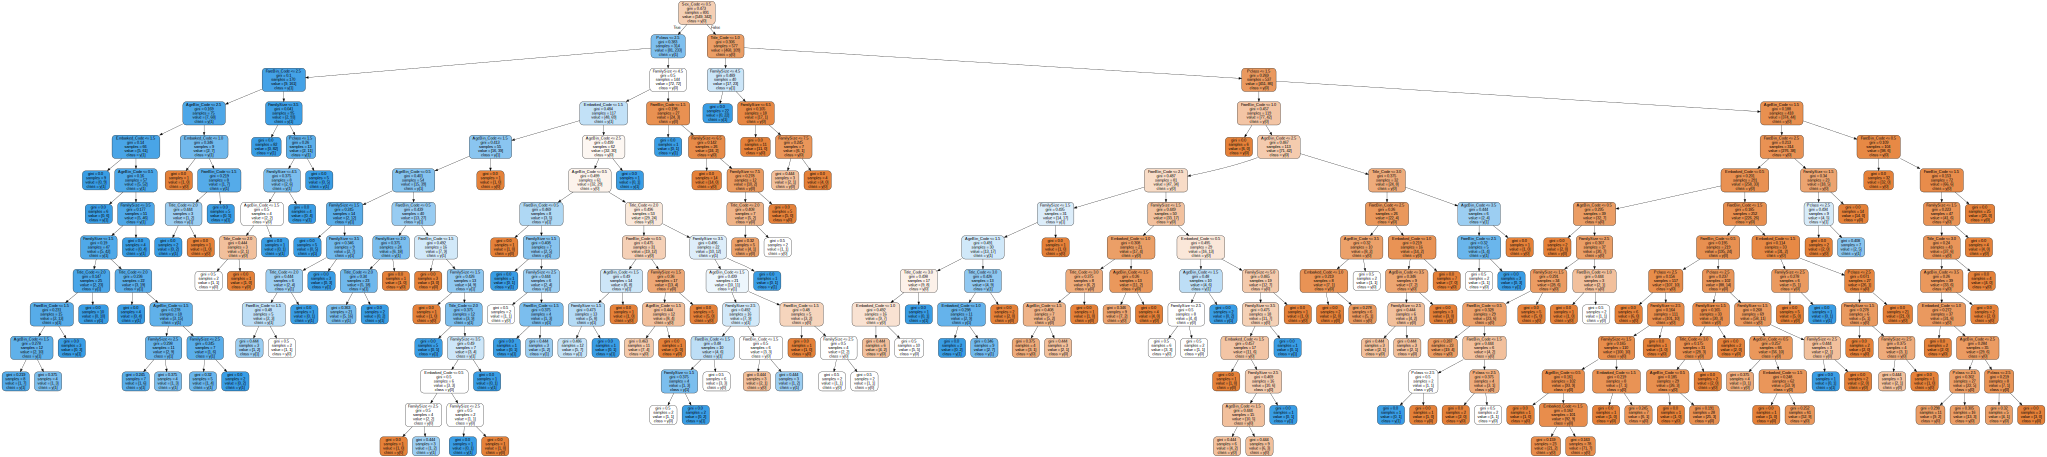

In [67]:
#用图形表示这棵决策树
import graphviz
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names = data1_x_bin,class_names = True,filled = True,rounded = True)
graph = graphviz.Source(dot_data)
graph

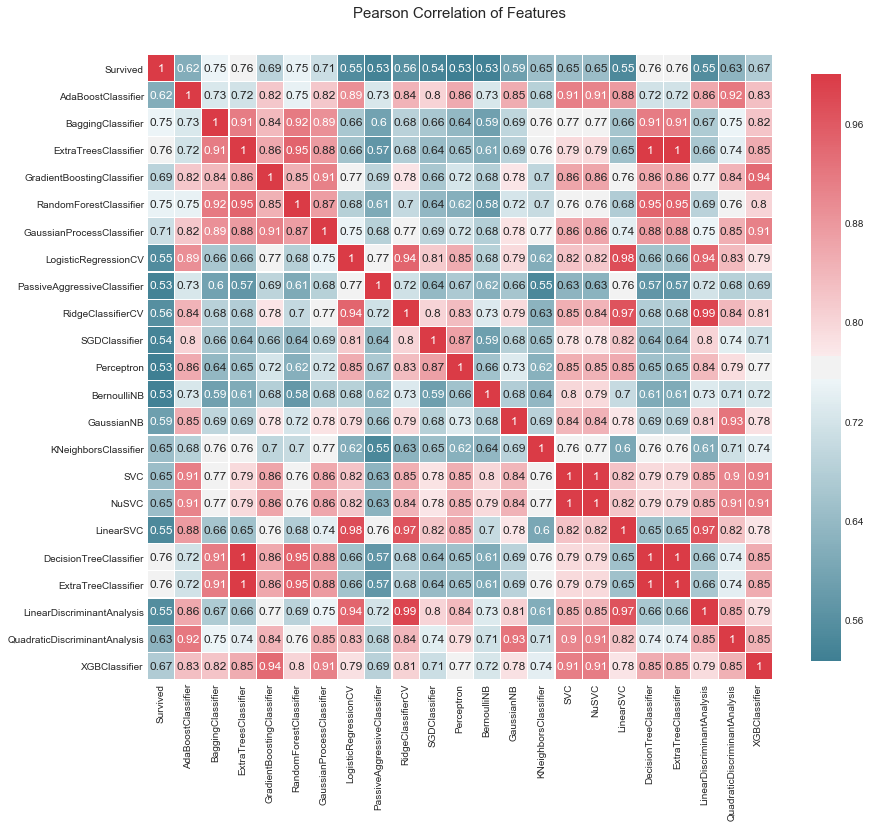

In [69]:
correlation_heatmap(MLA_predict)